Na  zajęciach uczyliśmy się podstaw Pulpa. 
Zaczęliśmy od instalacji pulpa, która odbywa się przez wpisanie odpowiednich linijek kodu:

In [ ]:
!pip install pulp
!sudo apt-get install coinor-cbc glpk-utils coinor-clp



Naszym celem na zajęciach było przeczytanie materiałów dotyczących pulp'a na stronie https://coin-or.github.io/pulp/main/index.html. Następnie należało przejść do "blending problem" a mianowicie należało przepisać kod do swojego notebooka. 
Problem, który mielismy rozwiązać:
Minimalizacja kosztów produkcji puszki karmy. Zmiennymi decyzyjnymi w tym przypadku są masy składników wrzucanych do puszki(x1,x2,x3,x4,x5,x6,x7). Ograniczeniami są minimalne wartości składników odżywczych oraz całkowita masa puszki. Puszka miała 100g.


Dane:

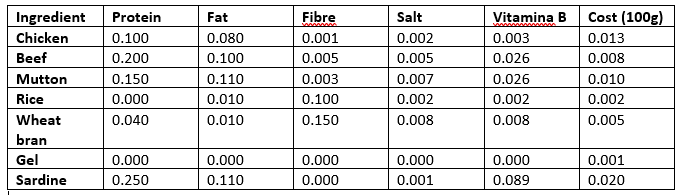


Minimalne wartości odżywcze na 100g puszki:

Protein - 8

Fat - 6

Fibre - 2

Salt - 0.4

Vitamina B - 0.8

In [7]:
from pulp import *

# Creates a list of the Ingredients
Ingredients = ['CHICKEN', 'BEEF', 'MUTTON', 'RICE', 'WHEAT', 'GEL','SARDINES']

# A dictionary of the costs of each of the Ingredients is created

costs = {'CHICKEN': 0.013, 
         'BEEF': 0.008, 
         'MUTTON': 0.010, 
         'RICE': 0.002, 
         'WHEAT': 0.005, 
         'GEL': 0.001,
         'SARDINES': 0.020}

# A dictionary of the protein percent in each of the Ingredients is created

proteinPercent = {'CHICKEN': 0.100, 
                  'BEEF': 0.200, 
                  'MUTTON': 0.150, 
                  'RICE': 0.000, 
                  'WHEAT': 0.040, 
                  'GEL': 0.000,
                  'SARDINES': 0.250}

# A dictionary of the fat percent in each of the Ingredients is created

fatPercent = {'CHICKEN': 0.080, 
              'BEEF': 0.100, 
              'MUTTON': 0.110, 
              'RICE': 0.010, 
              'WHEAT': 0.010, 
              'GEL': 0.000,
              'SARDINES': 0.110}

# A dictionary of the fibre percent in each of the Ingredients is created

fibrePercent = {'CHICKEN': 0.001, 
                'BEEF': 0.005, 
                'MUTTON': 0.003, 
                'RICE': 0.100, 
                'WHEAT': 0.150, 
                'GEL': 0.000,
                'SARDINES': 0.000}

# A dictionary of the salt percent in each of the Ingredients is created

saltPercent = {'CHICKEN': 0.002, 
               'BEEF': 0.005, 
               'MUTTON': 0.007, 
               'RICE': 0.002, 
               'WHEAT': 0.008, 
               'GEL': 0.000,
               'SARDINES': 0.001}

vitaminBPercent = {'CHICKEN': 0.003, 
               'BEEF': 0.026, 
               'MUTTON': 0.026, 
               'RICE': 0.002, 
               'WHEAT': 0.008, 
               'GEL': 0.000,
               'SARDINES': 0.089}

# Create the 'prob' variable to contain the problem data
prob = LpProblem("The Whiskas Problem", LpMinimize)

# A dictionary called 'ingredient_vars' is created to contain the referenced Variables
ingredient_vars = LpVariable.dicts("Ingr",Ingredients,0)

prob += lpSum([costs[i]*ingredient_vars[i] for i in Ingredients]), "Total Cost of Ingredients per can"

# The constraints are added to 'prob'
prob += lpSum([ingredient_vars[i] for i in Ingredients]) == 100, "PercentagesSum"
prob += lpSum([proteinPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 8.0, "ProteinRequirement"
prob += lpSum([fatPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 6.0, "FatRequirement"
prob += lpSum([fibrePercent[i] * ingredient_vars[i] for i in Ingredients]) <= 2.0, "FibreRequirement"
prob += lpSum([saltPercent[i] * ingredient_vars[i] for i in Ingredients]) <= 0.4, "SaltRequirement"             
prob += lpSum([vitaminBPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 0.8, "VitaminBRequirement"

# The problem data is written to an .lp file
prob.writeLP("WhiskasModel.lp")

# Solve given problem
prob.solve()

Content = []

# Get content of every ingredient
for v in prob.variables():
    Content.append(str(v.varValue)+'g')
    

# Print summary
summary = "Final product will cost " + str(value(prob.objective)) + " per can" + " and will contain:\n"

ingr_cont = [":".join((ingr, str(cont))) for ingr,cont in zip(Ingredients,Content)]
ingr_cont = ", ".join(ingr_cont)

summary += ingr_cont

print(summary)

Final product will cost 0.52 per can and will contain:
CHICKEN:60.0g, BEEF:0.0g, MUTTON:40.0g, RICE:0.0g, WHEAT:0.0g, GEL:0.0g, SARDINES:0.0g


/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
